## **Neural Network using Keras**

### Building an Image Classifier

In [ ]:
import tensorflow as tf 
from tensorflow import keras

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
keras.__version__

'2.4.0'

In [ ]:
## Load fasion MNIST datasets
## keras.datasets already splited data!
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape

(60000, 28, 28)

In [ ]:
## split training data to create validation set
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

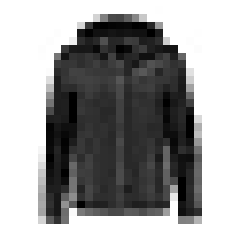

In [ ]:
import matplotlib.pyplot as plt

# lets check the image
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
# check y_train value
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
## corresponding class name
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

In [ ]:
# valid set contains 5000 images, test set contains 10,000
print(X_valid.shape)
print(X_test.shape)

(5000, 28, 28)
(10000, 28, 28)


In [ ]:
## build the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# can access layer individually
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
# can also access weights and biases
weights, biases = hidden1.get_weights()

weights

array([[ 0.04903442,  0.06585069, -0.0118312 , ..., -0.00963691,
        -0.05868287,  0.03824732],
       [-0.053451  ,  0.06340125, -0.04009679, ...,  0.01917237,
        -0.02961029, -0.0458052 ],
       [ 0.06104514,  0.02361781,  0.00745696, ..., -0.06473334,
         0.0696585 , -0.06868479],
       ...,
       [ 0.06857465, -0.0074971 , -0.05881234, ..., -0.01933692,
        -0.01808342,  0.0282089 ],
       [ 0.05226155,  0.01889794, -0.0103378 , ...,  0.00117362,
        -0.01865449,  0.06543519],
       [-0.02930089,  0.05199318,  0.02942662, ..., -0.00346115,
         0.04680441, -0.0441994 ]], dtype=float32)

In [ ]:
# compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

"""
same as
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

"""

'\nsame as\nmodel.compile(loss=keras.losses.sparse_categorical_crossentropy,\n              optimizer=keras.optimizers.SGD(),\n              metrics=[keras.metrics.sparse_categorical_accuracy])\n\n'

In [ ]:
# train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0023 - accuracy: 0.6892 - val_loss: 0.5048 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5008 - accuracy: 0.8255 - val_loss: 0.4395 - val_accuracy: 0.8472
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4462 - accuracy: 0.8445 - val_loss: 0.4192 - val_accuracy: 0.8528
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4196 - accuracy: 0.8504 - val_loss: 0.3925 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3969 - accuracy: 0.8602 - val_loss: 0.3835 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3773 - accuracy: 0.8668 - val_loss: 0.3823 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3651 - accuracy: 0.8697 - val_loss: 0.3592 - val_accuracy:

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
history.history

{'accuracy': [0.7665272951126099,
  0.8298181891441345,
  0.8460909128189087,
  0.8543636202812195,
  0.8613091111183167,
  0.8674363493919373,
  0.8705818057060242,
  0.8739636540412903,
  0.8781090974807739,
  0.8803636431694031,
  0.8839091062545776,
  0.8859090805053711,
  0.8872363567352295,
  0.8912909030914307,
  0.8919636607170105,
  0.8942545652389526,
  0.8960000276565552,
  0.8979636430740356,
  0.8997636437416077,
  0.9021818041801453,
  0.9036363363265991,
  0.9048181772232056,
  0.9065091013908386,
  0.9082000255584717,
  0.9093272686004639,
  0.9113273024559021,
  0.9129818081855774,
  0.9137636423110962,
  0.9154182076454163,
  0.9167272448539734],
 'loss': [0.717742919921875,
  0.48616644740104675,
  0.44150400161743164,
  0.4124836325645447,
  0.3922613263130188,
  0.37721437215805054,
  0.3643220067024231,
  0.35286056995391846,
  0.3423370122909546,
  0.3343011140823364,
  0.32528433203697205,
  0.3189677298069,
  0.3105505108833313,
  0.30421510338783264,
  0.29865

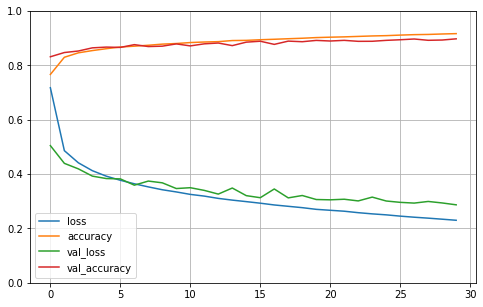

In [ ]:
# graph results
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8834


[0.3262530267238617, 0.883400022983551]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [ ]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

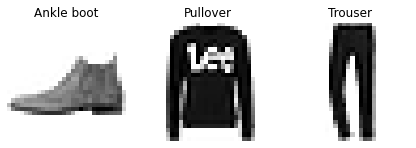

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Regression MLP

In [ ]:
# use california housing prices
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.5118 - val_loss: 4.3548
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9375 - val_loss: 0.8550
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7610 - val_loss: 0.7040
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7254 - val_loss: 0.7008
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6686 - val_loss: 0.6711
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6764 - val_loss: 0.6192
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6541 - val_loss: 0.6016
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6075 - val_loss: 0.5949
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5909 - val_loss: 0.5610
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5780 - val_loss: 0.5506

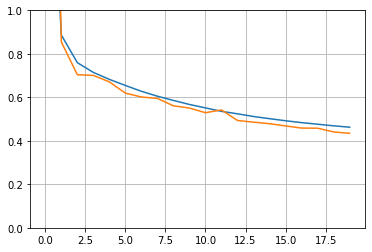

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
y_pred

array([[0.70682657],
       [1.332687  ],
       [3.1399302 ]], dtype=float32)

### Functional API

In [ ]:
# working with non-sequential structure
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.8104 - val_loss: 6.6364
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6851 - val_loss: 2.2968
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6295 - val_loss: 1.2417
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5958 - val_loss: 0.5458
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5555 - val_loss: 0.6721
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5474 - val_loss: 0.5068
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5201 - val_loss: 0.4849
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5079 - val_loss: 0.5083
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4880 - val_loss: 0.4946
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4846 - val_loss: 0.5248

In [ ]:
## using different subsets of inputs
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 4.0618 - val_loss: 9.4582
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9268 - val_loss: 0.7035
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6590 - val_loss: 0.6020
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6251 - val_loss: 0.6056
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5638 - val_loss: 0.5579
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5305 - val_loss: 0.5748
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4906 - val_loss: 0.5308
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4957 - val_loss: 0.4942
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4767 - val_loss: 0.4482
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4781 - val_loss: 0.4364

In [ ]:
## adding auxilary output
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.9590 - output_loss: 3.8519 - aux_output_loss: 4.9222 - val_loss: 2.1222 - val_output_loss: 1.8862 - val_aux_output_loss: 4.2465
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2670 - output_loss: 1.0646 - aux_output_loss: 3.0888 - val_loss: 1.1606 - val_output_loss: 0.8453 - val_aux_output_loss: 3.9978
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9251 - output_loss: 0.7976 - aux_output_loss: 2.0731 - val_loss: 1.0442 - val_output_loss: 0.7055 - val_aux_output_loss: 4.0926
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7821 - output_loss: 0.6922 - aux_output_loss: 1.5914 - val_loss: 0.9864 - val_output_loss: 0.6630 - val_aux_output_loss: 3.8966
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7402 - output_loss: 0.6617 - aux_output_loss: 1.4465 - val_loss: 0.9227 - val_output_loss: 0.6392 - val_aux_

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 1ms/step - loss: 0.4567 - output_loss: 0.4241 - aux_output_loss: 0.7502


### Subclassing API

In [ ]:
class WideAndDeepModel(keras.models.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 4.0940 - output_1_loss: 4.0128 - output_2_loss: 4.8243 - val_loss: 1.3999 - val_output_1_loss: 1.1657 - val_output_2_loss: 3.5083
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 1.2023 - output_1_loss: 0.9706 - output_2_loss: 3.2877 - val_loss: 1.0425 - val_output_1_loss: 0.8592 - val_output_2_loss: 2.6925
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9160 - output_1_loss: 0.7596 - output_2_loss: 2.3236 - val_loss: 0.9698 - val_output_1_loss: 0.7538 - val_output_2_loss: 2.9143
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7957 - output_1_loss: 0.6774 - output_2_loss: 1.8612 - val_loss: 0.9090 - val_output_1_loss: 0.6435 - val_output_2_loss: 3.2989
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7703 - output_1_loss: 0.6773 - output_2_loss: 1.6072 - val_loss: 0.9050 - val_output_1_loss: 0.6730 - val_ou

### Saving and Restoring

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Handson_ML")

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 3.9137 - val_loss: 2.7920
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8083 - val_loss: 0.6281
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6450 - val_loss: 0.5920
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6084 - val_loss: 0.5795
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5728 - val_loss: 0.5739
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5524 - val_loss: 0.5326
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5302 - val_loss: 0.4850
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5039 - val_loss: 0.4740
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4887 - val_loss: 0.4633
Epoch 10/10
162/162 [==============================] - 0s 721us/step - loss: 0.4674


In [ ]:
model.save("keras_model.h5")

In [ ]:
model = keras.models.load_model("keras_model.h5")

In [ ]:
model.predict(X_new)

array([[0.7335799],
       [1.3750284],
       [2.8550022]], dtype=float32)

In [ ]:
model.save_weights("keras_weights.ckpt")

In [ ]:
model.load_weights("keras_weights.ckpt")

### Callbacks during Training

In [ ]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation="relu", input_shape=[8]),
  keras.layers.Dense(30, activation="relu"),
  keras.layers.Dense(1)
])

In [ ]:
# call back to the best model
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 3.1853 - val_loss: 1.1809
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8926 - val_loss: 0.7127
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7013 - val_loss: 0.6329
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6444 - val_loss: 0.5864
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5857 - val_loss: 0.5495
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5594 - val_loss: 0.5163
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5253 - val_loss: 0.4903
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5048 - val_loss: 0.4704
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4780 - val_loss: 0.4571
Epoch 10/10
162/162 [==============================] - 0s 770us/step - loss: 0.4494


In [ ]:
# can also add early stopping
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4371 - val_loss: 0.4312
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4464 - val_loss: 0.4189
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4368 - val_loss: 0.4132
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4292 - val_loss: 0.4053
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4266 - val_loss: 0.4025
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4171 - val_loss: 0.4027
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4072 - val_loss: 0.3963
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4355 - val_loss: 0.3923
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4075 - val_loss: 0.3994
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3941 - val_lo

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - 0s 1ms/step - loss: 0.3462 - val_loss: 0.3565

val/train: 1.03


### TensorBoard

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [ ]:
def get_run_logdir():
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2021_02_14-03_51_42'

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 3.2610 - val_loss: 1.5338
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7974 - val_loss: 0.9140
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6982 - val_loss: 0.6632
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6720 - val_loss: 0.6094
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6441 - val_loss: 0.5911
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5833 - val_loss: 0.5727
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5606 - val_loss: 0.5532
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5604 - val_loss: 0.5391
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5470 - val_loss: 0.5202
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5307 - val_loss: 0.5030

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [ ]:
!kill 1406

### Hyperparameter Tuning

In [ ]:
# one method is using greedy algorithm as gridsearchCv or randomizedsearchCV
# to use gridsearch or randomizedsearch, need to wrap keras with sklearn

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layers in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss="mse", optimizer=optimizer)
  return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
history = keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.8818 - val_loss: 4.3903
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5691 - val_loss: 0.6575
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5271 - val_loss: 0.4678
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5003 - val_loss: 0.4583
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4754 - val_loss: 0.4328
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4540 - val_loss: 0.4517
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4243 - val_loss: 0.4317
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4301 - val_loss: 0.4277
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4314 - val_loss: 0.4480
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4112 - val_lo

In [ ]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 792us/step - loss: 0.3543


In [ ]:
y_pred = keras_reg.predict(X_new)

In [ ]:
y_pred

array([0.5968088, 1.6993409, 4.2384567], dtype=float32)

In [ ]:
!pip install scikit-learn==0.21.2 --upgrade

     |████████████████████████████████| 6.7MB 9.8MB/s 
ERROR: umap-learn 0.5.0 has requirement scikit-learn>=0.22, but you'll have scikit-learn 0.21.2 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
# use sklearn
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden" : [0, 1, 2, 3],
    "n_neurons" : np.arange(1, 100),
    "learning_rate" : reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.01751292968347984, n_hidden=2, n_neurons=19 .....
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 1s 2ms/step - loss: 1.2438 - val_loss: 8.9034
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4722 - val_loss: 3.9160
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4448 - val_loss: 1.7528
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3937 - val_loss: 0.8476
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3836 - val_loss: 0.4614
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3784 - val_loss: 0.3583
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3703 - val_loss: 0.3612
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3661 - val_loss: 0.3729
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3462 - val_loss: 0.3448
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3538 - val_loss: 0.3469
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.6s remaining:    0.0s


242/242 [==============================] - 1s 2ms/step - loss: 1.3112 - val_loss: 0.6904
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4175 - val_loss: 0.4586
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4071 - val_loss: 0.4898
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3731 - val_loss: 0.4946
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3608 - val_loss: 0.5315
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3798 - val_loss: 0.3827
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3782 - val_loss: 0.4962
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3701 - val_loss: 0.4505
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3506 - val_loss: 0.4324
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3509 - val_loss: 0.4116
E

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  8.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


363/363 [==============================] - 1s 2ms/step - loss: 0.9137 - val_loss: 2.4030
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.8121 - val_loss: 0.8975
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4220 - val_loss: 0.3421
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3745 - val_loss: 0.3226
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3512 - val_loss: 0.3365
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3369 - val_loss: 0.3581
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3364 - val_loss: 0.3192
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3282 - val_loss: 0.2878
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3001 - val_loss: 0.2955
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.2907 - val_loss: 0.3348
E

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f52233fa5c0>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f522f4629b0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_trai

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.023731083715346477, 'n_hidden': 2, 'n_neurons': 99}

In [ ]:
rnd_search_cv.best_score_

-0.2954622507095337

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 907us/step - loss: 0.2753


-0.27527308464050293

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 797us/step - loss: 0.2753


0.27527308464050293

### Exercise

In [ ]:
# load mnist Data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

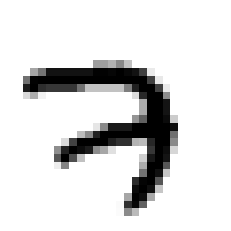

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# lets find the optimal learning rate, use callbacks to record loss and learning rate
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
  def __init__(self, factor):
    self.factor = factor
    self.rates = []
    self.losses = []
  def on_batch_end(self, batch, logs):
    self.rates.append(K.get_value(self.model.optimizer.lr))
    self.losses.append(logs["loss"])
    K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
# start from 1e-3 and increase by * 1.005 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [ ]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.5078 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

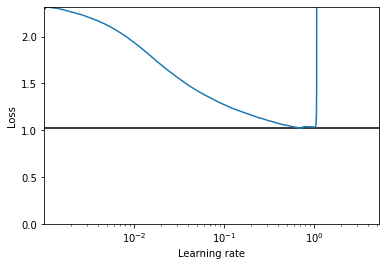

In [ ]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [ ]:
# use around 2e-1
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

In [ ]:
run_index = 1 # increment at each run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4081 - accuracy: 0.8723 - val_loss: 0.1047 - val_accuracy: 0.9718
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1019 - accuracy: 0.9687 - val_loss: 0.0945 - val_accuracy: 0.9732
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0641 - accuracy: 0.9793 - val_loss: 0.0758 - val_accuracy: 0.9788
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0827 - val_accuracy: 0.9760
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0735 - val_accuracy: 0.9802
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0764 - val_accuracy: 0.9796
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0720 - val_ac

In [ ]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0790 - accuracy: 0.9786


[0.07897114008665085, 0.978600025177002]

In [ ]:
%tensorboard --logdir=./my_mnist_logs --port=6006

In [1]:
!kill 1406

/bin/bash: line 0: kill: (1406) - No such process
